# Procesowanie obrazów siatkówki oka w celu identyfikacji 

Do przeprowadzenia analizy skorzystamy z datasetu STARE(STructured Analysis of the REtina) zawierajacego obrazy 397 siatkówek. Pliki w datasecie zapisane sa w formacie ppm(portable pixmap) co oznacza ze nie sa one skompresowane, caly dataset ma ponad 500 mb wiec dla wygody skorzystamy tylko ze 150 obrazów. Zamierzmay wykorzystac techniki procesowania sygnałow do przetwozenia siatkówek i pokazania że są unikalne dla kazdego człowieka. W tym celu wykorzsystamy wykrywanie krawedzi oraz korelacji aby pokazac ze siatkówka jest unikalna.

In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.signal as ss 
import scipy.ndimage as sn 
from PIL import Image
import cv2

In [3]:
folder_path = "data/archive"
image_paths = []

for filename in os.listdir(folder_path):
    if filename.endswith(".ppm"):
        image_paths.append(os.path.join(folder_path, filename))

# Store image paths in a CSV
df = pd.DataFrame(image_paths, columns=["img"])

## Obrazy jakie znajduja sie w STARE dataset 

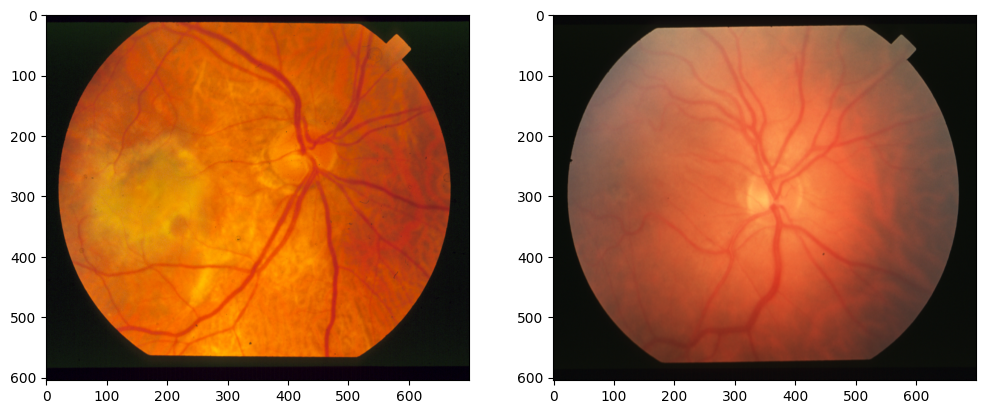

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

img1=Image.open(df["img"][0])
ax1.imshow(img1)

img2=Image.open(df["img"][64])
ax2.imshow(img2)

plt.show()

## Proces przetwarzania obrazów

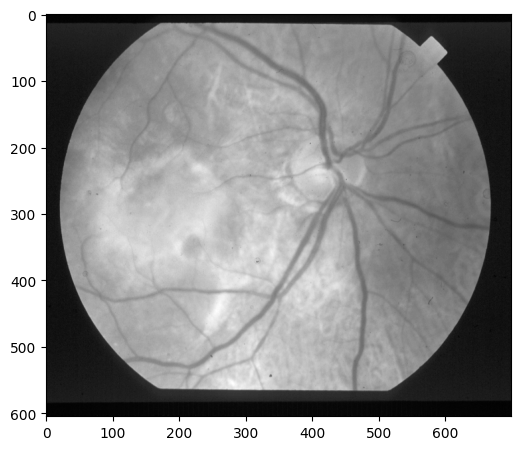

In [ ]:
plt.figure(figsize=(6,6))
img_gray=cv2.imread(df["img"][0],cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray,cmap="gray")
plt.show()

## Gaussian Blur 

### Matematyczna Definicja:

Gaussian blur opiera się na funkcji rozkładu Gaussa, której wzór jest następujący:

$
G(x, y) = \frac{1}{2 \pi \sigma^2} \cdot \exp\left(-\frac{x^2 + y^2}{2 \sigma^2}\right)
$

Gdzie:
- $G(x, y)$ to wartość funkcji Gaussa w punkcie \( (x, y) \)
- $\sigma$ to odchylenie standardowe, które kontroluje "rozmycie" (większe $ \sigma$ oznacza silniejsze rozmycie)
- $ x $ i $ y $ to współrzędne punktu względem środka filtra

**Proces wygładzania** obrazu polega na **konwolucji** (operacja mnożenia i sumowania) obrazu z filtrem Gaussa. Oznacza to, że dla każdego piksela w obrazie oblicza się średnią ważoną z pikseli wokół niego, gdzie wagi są zależne od funkcji Gaussa.

Formuła dla konwolucji obrazu $I$ z filtrem Gaussa wygląda następująco:

$
I_{\text{blurred}}(x, y) = \sum_{i=-k}^{k} \sum_{j=-k}^{k} I(x+i, y+j) \cdot G(i, j)
$

Gdzie:
- $I(x, y)$ to wartość piksela w oryginalnym obrazie
- $G(i, j)$ to wartość wagi z funkcji Gaussa
- $k$ to promień okna filtra (zwykle rozmiar filtra to $(2k+1) \times (2k+1)$ 

Przykładowy filtr Gaussa  $3 \times 3$  dla  $\sigma = 1$ :


\begin{bmatrix}
0.0751 & 0.1238 & 0.0751 \\
0.1238 & 0.2042 & 0.1238 \\
0.0751 & 0.1238 & 0.0751
\end{bmatrix}

**Proces wygładzania** zwizualizowany poniżej obrazuje działanie matematycznych założeń filtra gausa na przykładzie małego obrazu, wartosci z macierzy $3 \times 3$ zostały zaokraglone do dwóch miejsc po przecinku




<img src="imgs/blurrgif.gif" alt="segment" title="SegemntLocal" width="900" height="450"/>

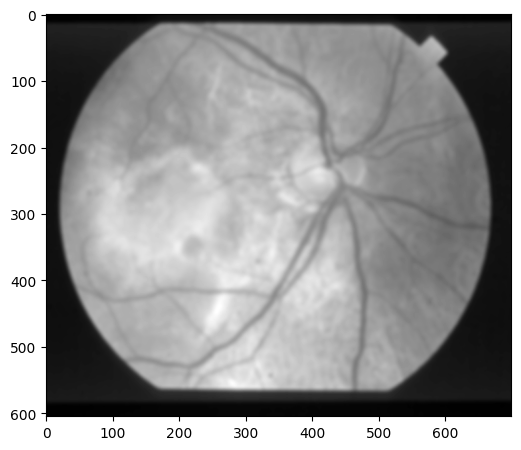

In [11]:
plt.figure(figsize=(6,6))
blurr_img=cv2.GaussianBlur(img_gray,(11,11),3)
plt.imshow(blurr_img,cmap="gray")
plt.show()

## Wykrywanie krawędzi 